### 2. Исследование случайных графов в модели WS
(newman_watts_strogatz_graph, watts_strogatz_graph, connected_watts_strogatz_graph)

Результаты работы сохранить в формате ipynb. Имя файла: PZ-3_WS_N, где N - Ваш порядковый номер по журналу учебных занятий.

2.1. Написать функцию, расчитывающую отклонения расчётных значений средней  длины пути и кластерного коэффициента от теоретических (слайд 24 лекции №2) в % от теоретических.

2.2. Используя функцию newman_watts_strogatz_graph, сгенерировать случайный граф с параметрами n = 100, r = 10, p = 0,01. Применить к нему функции 1.2, 1.3, 1.5, 2.1.

2.3. Повторить п.2.2 с параметрами n = 100, r = 10, p = 0,01; 0,1; 0,3; 0,9.

2.4. Сравнить результаты генерации для разных значений p. Наблюдаете ли Вы какию-либо закономерность? Выводы представьте в комментариях.

2.5. Повторить пп.1-3 для функций watts_strogatz_graph, connected_watts_strogatz_graph.

2.6. Сравнить результаты генерации графов для всех трёх функций. Какие отличительные особенности полученных графов  Вы можете назвать? Выводы представьте в комментариях. 

In [51]:
import numpy as np
import networkx as nx
from collections import Counter
from matplotlib import pylab as plt

def print_d(array):
    for key, val in array.items():
        print(f'{key}: {val}')

γ = 0.5772156649015328606065120
def plot_graph(G, draw_type, weight_name=None):
#     %matplotlib notebook
#     import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        if draw_type == "circular":
            nx.draw_circular(G)
        elif draw_type == "planar":
            nx.draw_circular(G)
        elif draw_type == "random":
            nx.draw_circular(G)
        elif draw_type == "spectral":
            nx.draw_circular(G)
        elif draw_type == "spring":
            nx.draw_circular(G)
        else:
            nx.draw_networkx(G)
            
def plot_chart(title="", x="", y="", log=False, *charts):
    plt.figure(figsize=(8,6))
    plt.tight_layout()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    if log == True:
        plt.xscale("log")
        plt.yscale("log")
    for one_chart in charts:   
        plt.plot(*one_chart["matrix"], one_chart["character"])
        
count_nodes_p = lambda G: len(G.nodes())
count_edges_p = lambda G: len(G.edges())
max_degree_nodes_p = lambda G: max(dict(G.degree()).values())
avg_degree_nodes_p = lambda G: sum(dict(G.degree()).values())/len(dict(G.degree()).values())
coeff_claster_p = lambda G: nx.average_clustering(G)
diameter_graph_p = lambda G: nx.diameter(G)
avg_path_len_p = lambda G: nx.average_shortest_path_length(G)

funcs_list_p = [
    {"func_name": "count_nodes_p", "func_cursor": count_nodes_p},
    {"func_name": "count_edges_p", "func_cursor": count_edges_p},
    {"func_name": "max_degree_nodes_p", "func_cursor": max_degree_nodes_p},
    {"func_name": "avg_degree_nodes_p", "func_cursor": avg_degree_nodes_p},
    {"func_name": "coeff_claster_p", "func_cursor": coeff_claster_p},
    {"func_name": "diameter_graph_p", "func_cursor": diameter_graph_p},
    {"func_name": "avg_path_len_p", "func_cursor": avg_path_len_p}
]

def max_connected_subgraph(G):
    max_connected_subgraph_G = G.subgraph(max(nx.connected_components(G), key=len))
    return {"check": True, "graph": max_connected_subgraph_G} if len(max_connected_subgraph_G.nodes()) >= 3/4*len(G.nodes()) else {"check": False, "graph": max_connected_subgraph_G}

generate_info_dict = lambda funcs_list, parameters: {func["func_name"]: func["func_cursor"](*parameters) for func in funcs_list}

# 2.1. 
Написать функцию, расчитывающую отклонения расчётных значений средней  длины пути и кластерного коэффициента от теоретических (слайд 24 лекции №2) в % от теоретических.

In [52]:
def diffs_avgPathLen_coeffClaster(G):
    n = count_nodes_p(G)
    k = avg_degree_nodes_p(G)
    return {
        "diff_avgPathLen_rg": abs(avg_path_len_p(G)-(np.log(n)/np.log(k)))/(np.log(n)/np.log(k))*100,
        "diff_coeffClaster_rg": abs(coeff_claster_p(G)-k/(n-1))/(k/(n-1))*100,
        "diff_avgPathLen_cl": abs(avg_path_len_p(G)-(0.5*n/k))/(0.5*n/k)*100,
        "diff_coeffClaster_cl": abs(coeff_claster_p(G)-(0.75*(k-2)/(k-1)))/(0.75*(k-2)/(k-1))*100,
    }

# 2.2.
Используя функцию newman_watts_strogatz_graph, сгенерировать случайный граф с параметрами n = 100, r = 10, p = 0,01. Применить к нему функции 1.2, 1.3, 1.5, 2.1.

в следующем пункте

# 2.3. 
Повторить п.2.2 с параметрами n = 100, r = 10, p = 0,01; 0,1; 0,3; 0,9.

{'count_nodes_p': 100, 'count_edges_p': 505, 'max_degree_nodes_p': 11, 'avg_degree_nodes_p': 10.1, 'coeff_claster_p': 0.6545454545454539, 'diameter_graph_p': 7, 'avg_path_len_p': 3.7022222222222223}
diff_avgPathLen_rg: 85.9110454135425
diff_coeffClaster_rg: 541.584158415841
diff_avgPathLen_cl: 25.21511111111111
diff_coeffClaster_cl: 1.9528619528620474


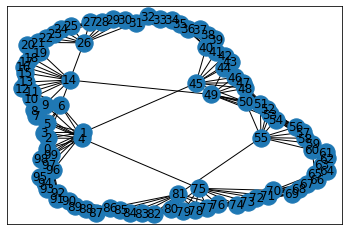

In [53]:
G = nx.newman_watts_strogatz_graph(100, 10, 0.01)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 549, 'max_degree_nodes_p': 13, 'avg_degree_nodes_p': 10.98, 'coeff_claster_p': 0.5716386946386941, 'diameter_graph_p': 5, 'avg_path_len_p': 2.6751515151515153}
diff_avgPathLen_rg: 39.18844634131873
diff_coeffClaster_rg: 415.4119377889865
diff_avgPathLen_cl: 41.253672727272715
diff_coeffClaster_cl: 15.293924684570642


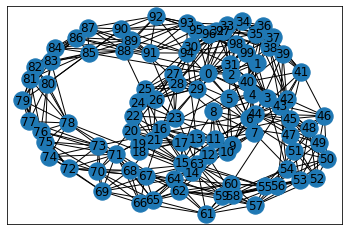

In [54]:
G = nx.newman_watts_strogatz_graph(100, 10, 0.1)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 655, 'max_degree_nodes_p': 17, 'avg_degree_nodes_p': 13.1, 'coeff_claster_p': 0.43584849301025747, 'diameter_graph_p': 3, 'avg_path_len_p': 2.214141414141414}
diff_avgPathLen_rg: 23.689832327143172
diff_coeffClaster_rg: 229.38168555737013
diff_avgPathLen_cl: 41.98949494949495
diff_coeffClaster_cl: 36.65145026517579


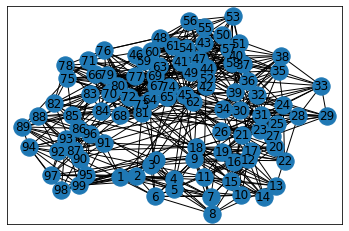

In [55]:
G = nx.newman_watts_strogatz_graph(100, 10, 0.3)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 951, 'max_degree_nodes_p': 26, 'avg_degree_nodes_p': 19.02, 'coeff_claster_p': 0.2899778626310796, 'diameter_graph_p': 3, 'avg_path_len_p': 1.84}
diff_avgPathLen_rg: 17.687367159328353
diff_coeffClaster_rg: 50.93484963447362
diff_avgPathLen_cl: 30.0064
diff_coeffClaster_cl: 59.06462135047354


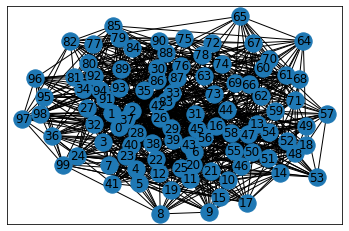

In [56]:
G = nx.newman_watts_strogatz_graph(100, 10, 0.9)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

# 2.4. 
Сравнить результаты генерации для разных значений p. Наблюдаете ли Вы какию-либо закономерность? Выводы представьте в комментариях.

Средний путь уменьшается

Кластерный коэффициент увеличивается

Средняя степень вершины растет => диаметр уменьшается

# 2.5. 
Повторить пп.1-3 для функций watts_strogatz_graph, connected_watts_strogatz_graph.

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 11, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.6409949494949493, 'diameter_graph_p': 8, 'avg_path_len_p': 3.7583838383838386}
diff_avgPathLen_rg: 87.91919191919193
diff_coeffClaster_rg: 534.5849999999998
diff_avgPathLen_cl: 24.832323232323226
diff_coeffClaster_cl: 3.850757575757602


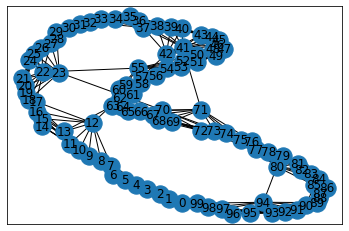

In [57]:
G = nx.watts_strogatz_graph(100, 10, 0.01)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 12, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.5059329004329002, 'diameter_graph_p': 5, 'avg_path_len_p': 2.742424242424242}
diff_avgPathLen_rg: 37.12121212121211
diff_coeffClaster_rg: 400.8735714285712
diff_avgPathLen_cl: 45.151515151515156
diff_coeffClaster_cl: 24.11006493506497


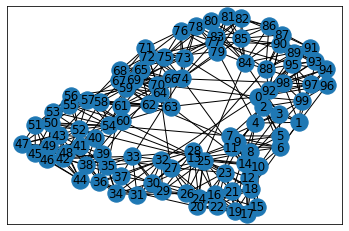

In [58]:
G = nx.watts_strogatz_graph(100, 10, 0.1)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 14, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.1, 'diameter_graph_p': 4, 'avg_path_len_p': 2.388888888888889}


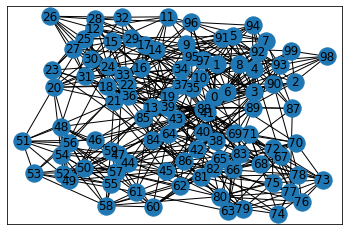

In [29]:
G = nx.watts_strogatz_graph(100, 10, 0.3)
print(generate_info_dict(funcs_list_p, (G,)))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 16, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.08858072483072478, 'diameter_graph_p': 3, 'avg_path_len_p': 2.2193939393939393}
diff_avgPathLen_rg: 10.969696969696962
diff_coeffClaster_rg: 12.305082417582467
diff_avgPathLen_cl: 55.61212121212121
diff_coeffClaster_cl: 86.71289127539129


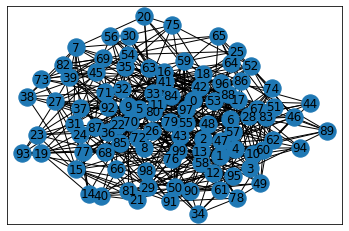

In [59]:
G = nx.watts_strogatz_graph(100, 10, 0.9)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 11, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.6582272727272719, 'diameter_graph_p': 10, 'avg_path_len_p': 4.406464646464647}
diff_avgPathLen_rg: 120.32323232323235
diff_coeffClaster_rg: 551.6449999999992
diff_avgPathLen_cl: 11.870707070707063
diff_coeffClaster_cl: 1.2659090909092119


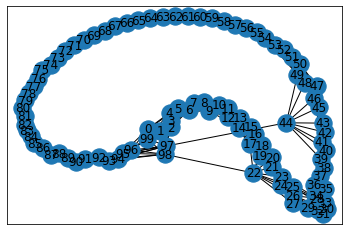

In [60]:
G = nx.connected_watts_strogatz_graph(100, 10, 0.01)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 13, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.4966969696969697, 'diameter_graph_p': 5, 'avg_path_len_p': 2.684848484848485}
diff_avgPathLen_rg: 34.24242424242425
diff_coeffClaster_rg: 391.73
diff_avgPathLen_cl: 46.303030303030305
diff_coeffClaster_cl: 25.495454545454542


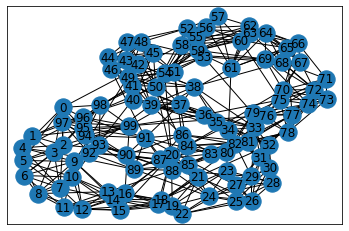

In [61]:
G = nx.connected_watts_strogatz_graph(100, 10, 0.1)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 14, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.2523247863247862, 'diameter_graph_p': 4, 'avg_path_len_p': 2.356161616161616}
diff_avgPathLen_rg: 17.808080808080806
diff_coeffClaster_rg: 149.8015384615384
diff_avgPathLen_cl: 52.87676767676768
diff_coeffClaster_cl: 62.15128205128207


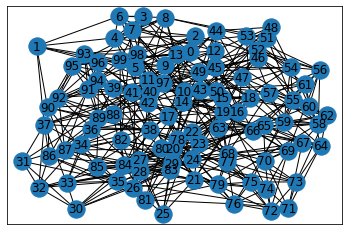

In [62]:
G = nx.connected_watts_strogatz_graph(100, 10, 0.3)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

{'count_nodes_p': 100, 'count_edges_p': 500, 'max_degree_nodes_p': 15, 'avg_degree_nodes_p': 10.0, 'coeff_claster_p': 0.10734138084138081, 'diameter_graph_p': 4, 'avg_path_len_p': 2.226060606060606}
diff_avgPathLen_rg: 11.303030303030305
diff_coeffClaster_rg: 6.2679670329670065
diff_avgPathLen_cl: 55.478787878787884
diff_coeffClaster_cl: 83.89879287379289


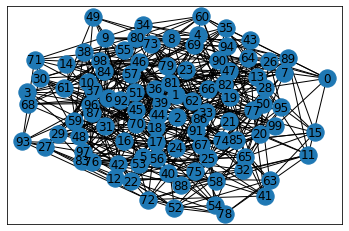

In [63]:
G = nx.connected_watts_strogatz_graph(100, 10, 0.9)
print(generate_info_dict(funcs_list_p, (G,)))
print_d(diffs_avgPathLen_coeffClaster(G))
mcs_G = max_connected_subgraph(G)
plot_graph(mcs_G['graph'], None)

Аналитически считать не лучшая идея но на краях (рядом с 0 или 1) выходит довольно неплохо.